In [ ]:
import numpy as np
import h5py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler

In [ ]:
data = pd.read_csv('fixed_dataset.csv')
data['target'] = data[['L730', 'L910']].sum(axis=1)
data['target'] = data['target'].apply(lambda x: 1 if x != 0 else x)

L905
1.0
target
0.39080459770114945
T22
0.040229885057471264
T21
0.028735632183908046
T25
0.028735632183908046
Y60
0.011494252873563218
T26
0.011494252873563218
T301
0.0
Y610
0.0
W45
0.0
L905
0.0
target
0.10312056737588653
T22
0.006524822695035461
T21
0.0043971631205673755
T25
0.004822695035460993
Y60
0.0024113475177304964
T26
0.0045390070921985815
T301
0.0024113475177304964
Y610
0.000425531914893617
W45
0.0024113475177304964


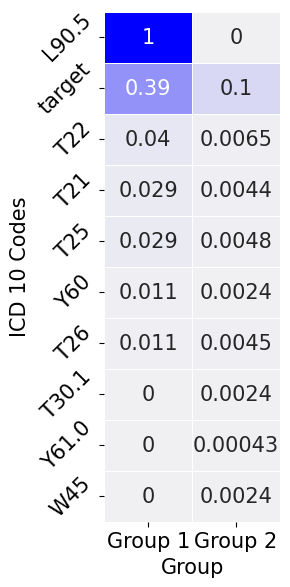

In [ ]:
colsss = ['L905',
    'target',
    'T22',
    'T21',
    'T25',
    'Y60',
    'T26',
    'T301',
    'Y610',
    'W45']
o = np.load('o.npy')

dot = {}

d1 = data[data['UKB ID'].isin(o)]
d1 = d1.set_index('UKB ID')
for i in colsss:
  dot[i] = [sum(d1[i])/len(d1[i])]
  print(i)
  print(sum(d1[i])/len(d1[i]))
d1 = data[~data['UKB ID'].isin(o)]
d1 = d1.set_index('UKB ID')
for i in colsss:
  dot[i].append(sum(d1[i])/len(d1[i]))
  print(i)
  print(sum(d1[i])/len(d1[i]))

d = pd.DataFrame(data=dot)
d['Group'] = ['Group 1', 'Group 2']
d = d.set_index('Group')
d = d.T
d['ICD 10 Codes'] = ['L90.5',
    'target',
    'T22',
    'T21',
    'T25',
    'Y60',
    'T26',
    'T30.1',
    'Y61.0',
    'W45']
d = d.set_index('ICD 10 Codes')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame
df = d

# Create a custom colormap (light to dark blue)
custom_cmap = sns.light_palette("blue", as_cmap=True)

# Create a heatmap using Seaborn with customization
plt.figure(figsize=(3, 6))
sns.heatmap(df, annot=True, cmap=custom_cmap, cbar=False, linewidths=.5, linecolor='white', annot_kws={"fontsize": 15})
#plt.title('Heatmap of Portion of Each Group With Each Feature', fontsize=10)

# Customize axis labels (slanted)
#plt.xticks(ha='right', fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Group',fontsize=15)
plt.ylabel('ICD 10 Codes', fontsize=15)
plt.tight_layout()
plt.savefig('casemapshort.png', bbox_inches='tight')
plt.show()

In [ ]:
o = np.load('o.npy')